<a href="https://colab.research.google.com/github/FaatihFath/Faatih-0110221006-Praktikum-Machine-Learning-/blob/main/Praktikum_12PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Praktikum Machine Learning/Praktikum 12"

In [4]:
# import library dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from mpl_toolkits.mplot3d import Axes3D   # untuk 3D plot

# agar plot tampil rapi
plt.rcParams['figure.figsize'] = (8, 6)


In [5]:
df = pd.read_csv(path +"/Data/wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
# menampilkan struktur dataset.seperti jumlah baris
# (entries), nama kolom, jumlah data non-null, serta tipe data pada setiap kolom.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
# Menampilkan rangkuman statistik deskriptif dari setiap kolom numerik
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [9]:
# cek missing Value (nilai yang kosong)
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [10]:
# Cek data duplicated
df.duplicated().sum()

np.int64(0)

In [14]:
# Distribusi kelas
print("Nama kelas:", wine.target_names)
df['target'].value_counts()

Nama kelas: ['class_0' 'class_1' 'class_2']


,count
target,
1,71
0,59
2,48


Pemisahan Fitur & Label
(Tahap ini bertujuan untuk memisahkan data fitur (X) dan label target (y) dari dataset. Fitur (X) berisi nilai-nilai variabel independen (dalam hal ini fitur kimia pada Sirup), sedangkan label (y)
berisi variabel dependen atau kelas yang akan diprediksi (jenis Sirup).)

In [17]:
# Pemisahan fitur & Label
X = wine.data
Y = wine.target

print("Shape X", X.shape)
print("Shape Y", Y.shape)


# X wine.data
# o Menyimpan seluruh fitur numerik dari dataset Sirup ke dalam variabel X.
# o Dataset memiliki 13 fitur kimia, seperti kadar alkohol, fenol, magnesium, dll.
# o Dengan demikian, X memiliki bentuk (178, 13) → artinya ada 178 baris data dan 13 kolom
#fitur.

# Y wine.target
# o Menyimpan kolom label target ke dalam variabel y.
# o Kolom ini berisi nilai 0, 1, atau 2, yang merepresentasikan tiga jenis Sirup berbeda.
# o Bentuknya (178,) karena hanya satu kolom target untuk setiap baris data.

Shape X (178, 13)
Shape Y (178,)


Pembagian Data Train & Testing

In [19]:
# train-test-split (80% train, 20% Test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
    )

print("Shape X_train", X_train.shape)
print("Shape X_test", X_test.shape)


Shape X_train (142, 13)
Shape X_test (36, 13)


Standarisasi Data (Mean = 0, std =1)

In [21]:
# Standardrisasi data (Mean = 0, STD = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 0.38580089, -0.63787118,  1.77666817, -1.22453161,  0.69643032,
         0.52686525,  0.73229212, -0.1695489 , -0.41578344, -0.16746725,
         0.62437819,  0.2529082 ,  0.46772474],
       [ 0.94851892, -0.76544542,  1.25317383,  0.85328406,  0.09178497,
         1.17279546,  1.33318146, -0.59045701,  1.34974202,  0.30530313,
         1.06715537,  0.15104809,  1.81576773],
       [ 0.52335419, -0.51940939,  0.9540342 , -1.04643312, -0.44567755,
         0.93057163,  1.006382  , -0.1695489 , -0.26000178, -0.081509  ,
        -0.12834302,  0.89317174,  1.51620262],
       [ 0.97352861, -0.55585917,  0.16879269, -1.0761162 , -0.71440882,
         0.52686525,  0.81662747, -0.59045701,  0.36312485,  0.262324  ,
         0.8900445 ,  0.42752553,  1.93226527],
       [ 0.43582027,  0.82012009,  0.05661533,  0.55645325, -0.51286037,
        -0.55506784, -1.29175618,  0.75644894, -0.60618325,  1.47433535,
        -1.76661859, -1.43505932, -0.29783054]])

In [24]:
# Penerapan Model SVM tanpa PCA
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, Y_train)

# prediksi dan evaluasi.
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(Y_test, y_pred_no_pca)
print("Akurasi tanpa PCA:", acc_no_pca)

print("Classification Report (tanpa PCA)")
print(classification_report(Y_test, y_pred_no_pca))

Akurasi tanpa PCA: 0.9722222222222222
Classification Report (tanpa PCA)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [25]:
# Penerapan PCA (Principal component Analysis)

# PCA dengan 3 komponen utama
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Shape X_train_pca", X_train_pca.shape)
print("Shape X_test_pca", X_test_pca.shape)

Shape X_train_pca (142, 3)
Shape X_test_pca (36, 3)


In [26]:
# Menampilkan variansi yang dijelaskan oleh setiap komponen PCA

# Variansi yang dijelaskan oleh tiap komponen
explained_variance = pca.explained_variance_ratio_
print("Variansi yang dijelaskan oleh setiap komponen PCA:", explained_variance)
print("Total varian yang dijelaskan 3 Komponent Pertama:", sum(explained_variance))

Variansi yang dijelaskan oleh setiap komponen PCA: [0.35792104 0.19270671 0.11019835]
Total varian yang dijelaskan 3 Komponent Pertama: 0.6608261082211258


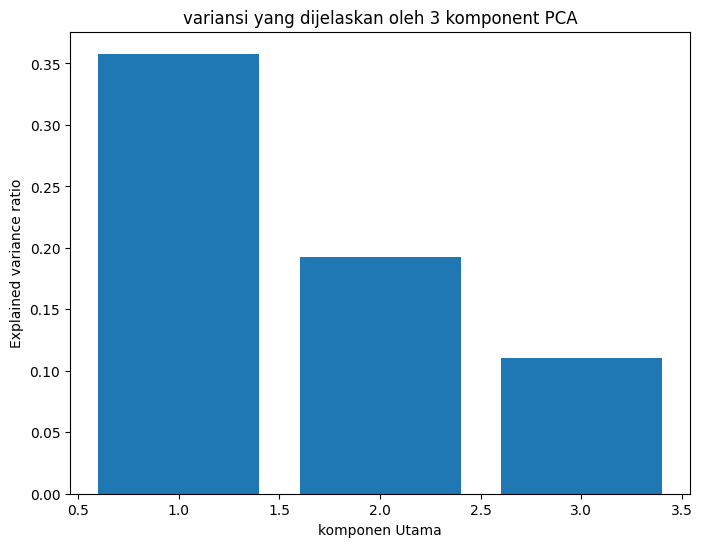

In [27]:
plt.bar([1,2,3], explained_variance)
plt.xlabel('komponen Utama')
plt.ylabel('Explained variance ratio')
plt.title('variansi yang dijelaskan oleh 3 komponent PCA')
plt.show()

In [28]:
# Membangun Model SVM dengan PCA

# Model SVM dengan PCA
svw_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svw_pca.fit(X_train_pca, Y_train)

# Prediksi dan evaluasi
y_pred_pca = svw_pca.predict(X_test_pca)

acc_pca = accuracy_score(Y_test, y_pred_pca)
print("Akurasi SVM dengan PCA (3 komponen):", acc_pca)

print("Classification Report (dengan PCA)")
print(classification_report(Y_test, y_pred_pca, target_names=wine.target_names))

Akurasi SVM dengan PCA (3 komponen): 0.9722222222222222
Classification Report (dengan PCA)
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



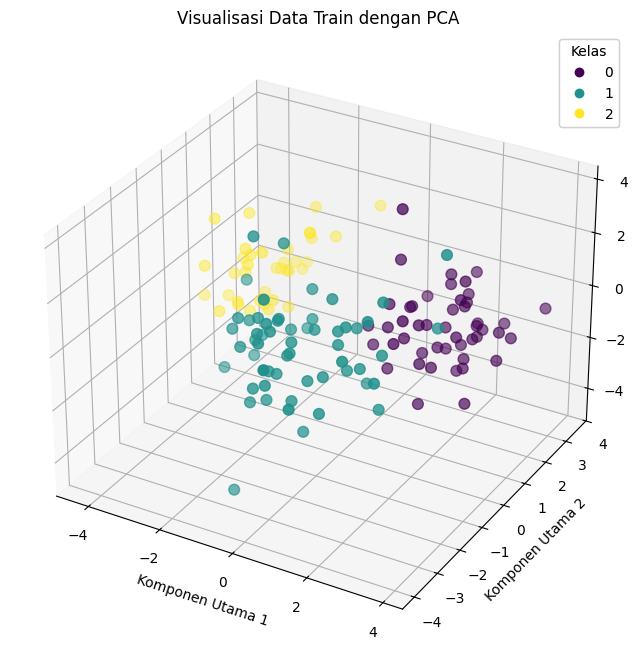

In [29]:
# Visualisasi 3D PCA (menggunakan Data Train)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=Y_train,
    s=60,
    cmap='viridis'
)

ax.set_title('Visualisasi Data Train dengan PCA')
ax.set_xlabel('Komponen Utama 1')
ax.set_ylabel('Komponen Utama 2')
ax.set_zlabel('Komponen Utama 3')

# Tambahkan Legend berdasarkan kelas
legend1 = ax.legend(*scatter.legend_elements(), title="Kelas")

ax.add_artist(legend1)

plt.show()


In [35]:
# Perbandingan hasil Model PCA dan Tanpa PCA

comparison = pd.DataFrame ({
    'Model': ['SVM tanpa PCA', 'SVM dengan PCA (3 Komponen)'],
    'Jumlah Fitur' : [X.shape[1], X_train_pca.shape[1]],
    'Akurasi': [acc_no_pca, acc_pca],
    'Variansi Total PCA': [None, sum(explained_variance)]
})

comparison

,Model,Jumlah Fitur,Akurasi,Variansi Total PCA
0,SVM tanpa PCA,13,0.972222,NaN
1,SVM dengan PCA (3 Komponen),3,0.972222,0.660826


Dari hasil disimpulkan bahwa:

• Jumlah fitur berkurang drastis dari 13 menjadi 3 komponen utama.

• Akurasi model tetap sama tinggi (97.22%), meskipun jumlah fitur direduksi hingga lebih dari 75%.

• Variansi total PCA (0.66) menunjukkan bahwa ketiga komponen utama sudah mewakili sekitar 66% informasi dari data asli.

• Hal ini membuktikan bahwa PCA dapat menyederhanakan data tanpa kehilangan performa
model.

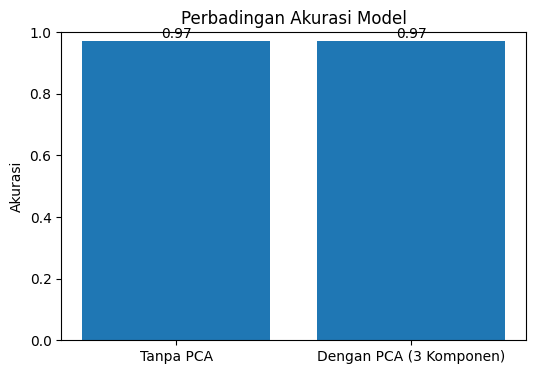

In [37]:
# Visualisasi Grafik
plt.figure(figsize=(6, 4))
plt.bar(['Tanpa PCA', 'Dengan PCA (3 Komponen)'], [acc_no_pca, acc_pca])
plt.title('Perbadingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
for i, v in enumerate([acc_no_pca, acc_pca]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

Intepretasi Hasil Grafik:

• Kedua model (tanpa PCA dan dengan PCA) memiliki akurasi yang identik (0.97).

• Ini menunjukkan bahwa reduksi dimensi dengan PCA tidak menurunkan kinerja model SVM.

• Model dengan PCA justru lebih efisien, karena menggunakan lebih sedikit fitur dan lebih cepat
dalam pelatihan.